<a href="https://colab.research.google.com/github/CarlosTertuliano/imersao_dados_4/blob/main/imersao_dados_4_dia_4_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [28]:
dados [["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [29]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]

In [30]:
url_ibge = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"

dados_ibge = pd.read_csv(url_ibge,encoding = 'ISO-8859-1', sep = ';', thousands='.',decimal=',')

dados_ibge.dropna(how="all", axis=1, inplace=True)

dados_ibge.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


Na aula anterior foi mencionado que traríamos uma forma mais efetiva e bem mais interessante de associar os dados de vendas dos imóveis com os dados do IBGE. Então mãos a obra e vamos o que podemos fazer.

In [31]:
enderecos = pd.read_csv('/content/drive/MyDrive/imersao_dados4/enderecos.csv')

enderecos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.0,-30.882674,-55.548830
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.0,-30.855721,-55.555757
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.0,-30.863149,-55.552083
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.0,-30.864415,-55.545860


Inicialmente buscamos uma nova base de dados que nos dará a latitude e a longitude e poderemos associar isso ao nome das ruas que temos nos demais dados.

In [32]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")

enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588


Percebemos também que os dados importados continham informações de todos os estados do nosso país, então selecionamos apenas aqueles do nosso interesse.

In [33]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]

enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()

enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588,rua joão bandini


Ao concatenar essas duas colunas, obtemos uma coluna semelhante a que já temos nos dados de vendas de imóveis e já ajustamos os seus carácteres para que facilite a concatenação das tabelas. Agora vamos tratar a outra

In [34]:
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


Retiramos todos os números e símbolos contidos na coluna *Rua*.

In [35]:
dados_vendas["apenas_ruas"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')

dados_vendas["apenas_ruas"] = dados_vendas["apenas_ruas"].str.lower().str.strip()

dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,apenas_ruas
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto


Tudo pronto, agora podemos juntar as duas tabelas para prosseguir com a nossa análise.

In [36]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[['rua', 'cep', 'latitude', 'longitude']], how='left', left_on="apenas_ruas", right_on="rua").drop_duplicates(subset=dados_vendas.columns).query("cep > 0")

dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,apenas_ruas,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,avenida itacira,avenida itacira,11443160.0,-23.975993,-46.201317
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.0,-23.640961,-46.688311
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,rua alba valdez,rua alba valdez,4845200.0,-23.752990,-46.695889
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,NaN,NaN,18125000.0,-23.531043,-47.255023
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,rua tobias barreto,rua tobias barreto,13474663.0,-22.698901,-47.294461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,avenida odila,avenida odila,4058020.0,-23.609093,-46.647258
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,rua tapuçu,rua tapuçu,4671185.0,-23.661018,-46.691521
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,rua guararema,rua guararema,13030640.0,-22.922749,-47.076960
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,rua estero belaco,rua estero belaco,4145020.0,-23.616124,-46.632983


Para melhor análise dos nossos dados vamos tentar encontrar a região que eles foram associados na pesquisa do censo, para que assim possamos realizar melhores comparações entre as regiões e dentro delas.

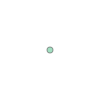

In [37]:
from shapely.geometry import Point
latitude = -23.56
longitude = -46.59
Point(longitude, latitude)

Podemos obter um ponto em uma determinada coordenada e também criar figuras geométricas.

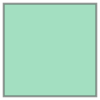

In [38]:
from shapely.geometry import Polygon

Polygon([[0,0], [1,0], [1,1], [0,1], [0,0]])

Além disso podemos verificar se esse ponto está contido ou não na figura geométrica

In [39]:
Polygon([[0,0], [1,0], [1,1], [0,1], [0,0]]).contains(Point(0.1,0.9))

True

E é exatamente isso que faremos, pegar a latitude e a longitude de acordo e verificar em qual área elas estão localizadas de acordo com as informações da base de dados a seguir, que nos dará as coordenadas de cada região do censo mapeada. Dessa forma poderemos saber com uma maior precisão de onde são cada um dos dados que temos.

In [40]:
!pip install geopandas

import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
setor_censo = gpd.read_file('/content/drive/MyDrive/imersao_dados4/sp_setores_censitarios/35SEE250GC_SIR.shp')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [42]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.0,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


Um exemplo do que foi mencionado anteriormente, passando as coordenadas para descobrir a qual setor do censo elas pertencem.

In [43]:
dados_geo = pd.read_csv('/content/drive/MyDrive/imersao_dados4/dados_geo.csv')

Iremos importar a tabela dada na aula para facilitar o trabalho, a seguir segue o código que geraria os dados dessa tabela. Ela irá informar o setor do censo ao qual cada um dos dados pertence.

In [44]:
dados_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            5605 non-null   object 
 1   Bairro         5597 non-null   object 
 2   Cidade         5605 non-null   object 
 3   Metragem       5605 non-null   int64  
 4   Quartos        5605 non-null   int64  
 5   Banheiros      5605 non-null   int64  
 6   Vagas          5605 non-null   int64  
 7   Valor          5605 non-null   object 
 8   Valor_anuncio  5605 non-null   float64
 9   Tipo_anuncio   0 non-null      float64
 10  Valor_mm       5605 non-null   float64
 11  Valor_m2       5605 non-null   float64
 12  rua            5605 non-null   object 
 13  cep            5605 non-null   float64
 14  latitude       5605 non-null   float64
 15  longitude      5605 non-null   float64
 16  Point          5605 non-null   object 
 17  setor_censo    5320 non-null   float64
dtypes: float

In [45]:
#dados_geo["Point"] = ""
#for i in dados_geo.index:
    #dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

#dados_geo['setor_censo'] = dados_geo["Point"].map(
    #lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
#).str[0]
#dados_geo

Iremos juntar os valores das nossas bases de dados para que possamos analisar as informações.

In [46]:
dados_vendas_censo = pd.merge(left=dados_geo[dados_geo["setor_censo"].notnull()], right= dados_ibge, how="left", left_on = "setor_censo", right_on = "Cod_setor")

dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46




---
# Desafio 1: Realizar uma análise dos dados do IBGE por mapa


A partir das coordenadas presentes nos nossos dados poderemos criar os mapas, segue abaixo o mapa do estado de São Paulo.

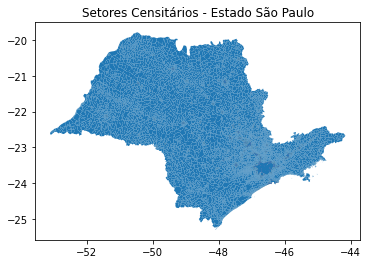

In [47]:
ax2 = setor_censo.plot()
ax2.set_title('Setores Censitários - Estado São Paulo');

Segue abaixo o mapa do município de São Paulos

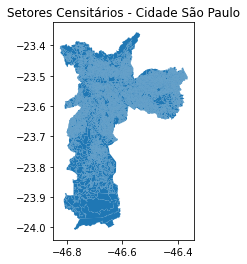

In [48]:
sao_paulo = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO'].reset_index(drop=True)
ax2 = sao_paulo.plot()
ax2.set_title('Setores Censitários - Cidade São Paulo');

In [50]:
import folium

from folium import Choropleth, Marker
from folium.plugins import MarkerCluster

Agora que temos o mapa de São Paulo, utilizaremos o comando *to_crs('epsg:3857')* para nos dar a mesma projeção usada pelo Google Street.

In [51]:
sao_paulo_street_maps = sao_paulo.to_crs('epsg:3857')

In [52]:
dados_ibge.Cod_setor = dados_ibge.Cod_setor.astype(str)
sao_paulo_df = sao_paulo.merge(dados_ibge, left_on='CD_GEOCODI', right_on='Cod_setor', how='left')

sao_paulo_df.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,109347.0,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,...,3.09,2.11,1335.48,3982486.43,1397.96,4082041.23,860.76,1933007.93,1241.68,2316552.19
1,109348.0,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,...,3.00,2.82,998.03,787438.49,1125.73,744229.10,708.58,626557.02,1047.18,571259.43
2,109349.0,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,...,3.37,2.78,1057.50,1098171.92,1270.25,1048565.77,697.24,735503.32,1082.56,724807.31
3,109350.0,355030804000082,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,...,3.23,2.25,1296.16,28854714.26,1586.09,34875611.24,777.64,10751997.93,1304.12,17358390.21
4,109351.0,355030804000083,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,...,3.24,2.57,893.58,717708.36,1051.93,678067.75,592.82,474377.58,919.90,435113.89


Criando o mapa buscando centralizar ele junto ao centro de São Paulo.

In [54]:
center = [-23.53, -46.65]
# Create a map
m_stamem = folium.Map(location=center, 
                 width=500,height=500,
                 tiles='Stamen Toner', zoom_start=12)

# Display the map
m_stamem

A seguir criamos o mapa na representação do Google Street.

In [55]:
# Create a Open Street Map
m_open_street = folium.Map(location=center, 
                 width=500,height=500,
                 tiles='OpenStreetMap', zoom_start=12)

# Display the map

m_open_street

O próximo comando irá nos dar as posições centrais de acordo com a latitude e a longitude para que possamos localizar no mapa.

In [56]:
sao_paulo_df['centroid'] = sao_paulo_df['geometry'].apply(lambda z: (z.centroid.y, z.centroid.x))

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18953 entries, 0 to 18952
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     18953 non-null  float64 
 1   CD_GEOCODI             18953 non-null  object  
 2   TIPO                   18953 non-null  object  
 3   CD_GEOCODS             18953 non-null  object  
 4   NM_SUBDIST             0 non-null      object  
 5   CD_GEOCODD             18953 non-null  object  
 6   NM_DISTRIT             18953 non-null  object  
 7   CD_GEOCODM             18953 non-null  object  
 8   NM_MUNICIP             18953 non-null  object  
 9   NM_MICRO               18953 non-null  object  
 10  NM_MESO                18953 non-null  object  
 11  CD_GEOCODB             0 non-null      object  
 12  NM_BAIRRO              0 non-null      object  
 13  ID1                    18953 non-null  int64   
 14  geometry               18953 n

Agora iremos adicionar os pontos ao mapa

In [57]:
# Add points to the map
mc = MarkerCluster()
for idx, row in sao_paulo_df.sample(500).iterrows():
    mc.add_child(Marker(row['centroid'], popup=row['NM_BAIRRO']))

m_stamem.add_child(mc)

# Display the map
m_stamem

In [ ]:
#Próximo mapa está em construção...



---

# Desafio 2: Aprofundar a análise entre dados de vendas e renda.

Podemos verificar a correlação existente entre as variáveis que indicam valores e as que podem influenciar nos valores dos imóveis, segue o gráfico de correlação.

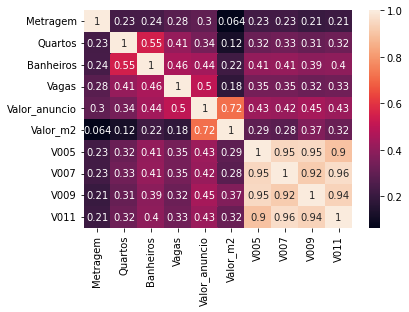

In [59]:
corr = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_m2', 'V005', 'V007', 'V009', 'V011']].corr()

sns.heatmap(corr, annot=True)

A partir dela podemos perceber que as variáveis que dizem respeito a renda das famílias tem uma certa influência sobre o preço dos imóveis. Para confirmar isso precisaremos investigar mais.